# NEURAL NETWORK MODEL BUILD

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Load Train and Test Datasets

In [22]:
df_train = pd.read_csv('../../2_Modeling-Phase/train_and_test_datasets/NSL-KDD/train.csv')
df_test = pd.read_csv('../../2_Modeling-Phase/train_and_test_datasets/NSL-KDD/test.csv')

In [23]:
X_train = df_train.drop(['binary_attack'], axis=1)  # Features
y_train = df_train['binary_attack']  # Target variable

In [24]:
X_test = df_test.drop(['binary_attack'], axis=1)  # Features
y_test = df_test['binary_attack']  # Target variable

In [25]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## Verify shapes

In [26]:
print("Train shape:", X_train.shape, y_train.shape)
print("Validation shape:", X_val.shape, y_val.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (100778, 42) (100778,)
Validation shape: (25195, 42) (25195,)
Test shape: (22544, 42) (22544,)


## Scale the Data

In [27]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Build Neural Network

In [28]:
# Define the neural network
model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),  # Input and first hidden layer
    Dropout(0.3),  # Dropout for regularization
    Dense(32, activation='relu'),  # Second hidden layer
    Dropout(0.2),  # Dropout for regularization
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

/Users/mohammedabdulai/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,865 (19.00 KB)

 Trainable params: 4,865 (19.00 KB)

 Non-trainable params: 0 (0.00 B)

## Train the Model

In [29]:
# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=20,  # Number of epochs
    batch_size=32,  # Batch size
    verbose=2
)

Epoch 1/20
3150/3150 - 5s - 2ms/step - accuracy: 0.9858 - loss: 0.0451 - val_accuracy: 0.9944 - val_loss: 0.0188
Epoch 2/20
3150/3150 - 4s - 1ms/step - accuracy: 0.9942 - loss: 0.0192 - val_accuracy: 0.9960 - val_loss: 0.0125
Epoch 3/20
3150/3150 - 4s - 1ms/step - accuracy: 0.9952 - loss: 0.0131 - val_accuracy: 0.9963 - val_loss: 0.0108
Epoch 4/20
3150/3150 - 4s - 1ms/step - accuracy: 0.9957 - loss: 0.0111 - val_accuracy: 0.9965 - val_loss: 0.0118
Epoch 5/20
3150/3150 - 4s - 1ms/step - accuracy: 0.9961 - loss: 0.0099 - val_accuracy: 0.9969 - val_loss: 0.0128
Epoch 6/20
3150/3150 - 4s - 1ms/step - accuracy: 0.9967 - loss: 0.0090 - val_accuracy: 0.9976 - val_loss: 0.0112
Epoch 7/20
3150/3150 - 4s - 1ms/step - accuracy: 0.9966 - loss: 0.0088 - val_accuracy: 0.9971 - val_loss: 0.0114
Epoch 8/20
3150/3150 - 4s - 1ms/step - accuracy: 0.9970 - loss: 0.0086 - val_accuracy: 0.9980 - val_loss: 0.0128
Epoch 9/20
3150/3150 - 4s - 1ms/step - accuracy: 0.9973 - loss: 0.0073 - val_accuracy: 0.9972 - 

# Model Evaluation

In [36]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Test Loss: {test_loss}")
print("Test Accuracy:   {:.2%}".format(test_accuracy))

705/705 - 1s - 743us/step - accuracy: 0.8600 - loss: 1.9215
Test Loss: 1.9215162992477417
Test Accuracy:   86.00%


# Analyze Results

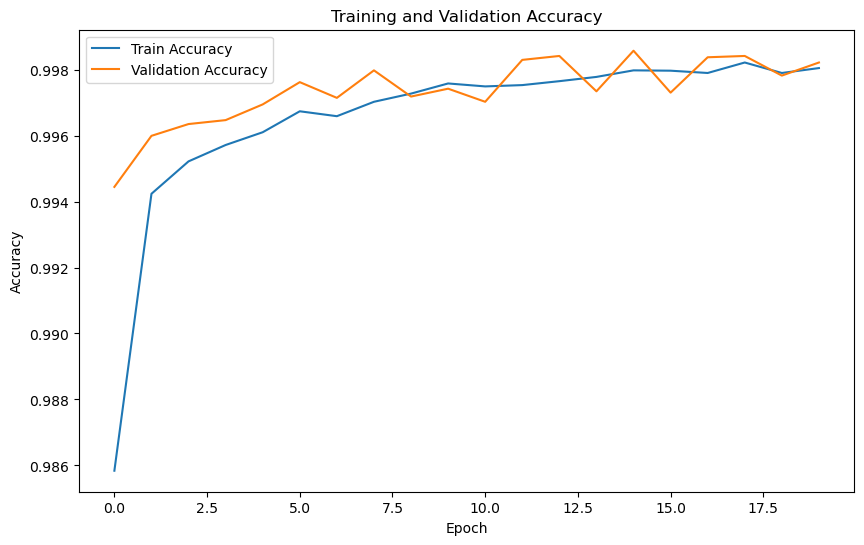

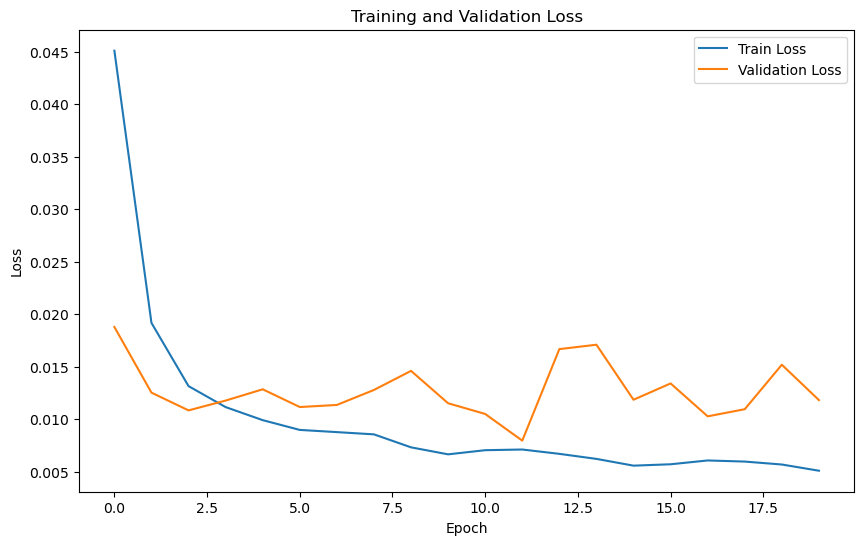

In [32]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Generate Confusion Matrix

705/705 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step


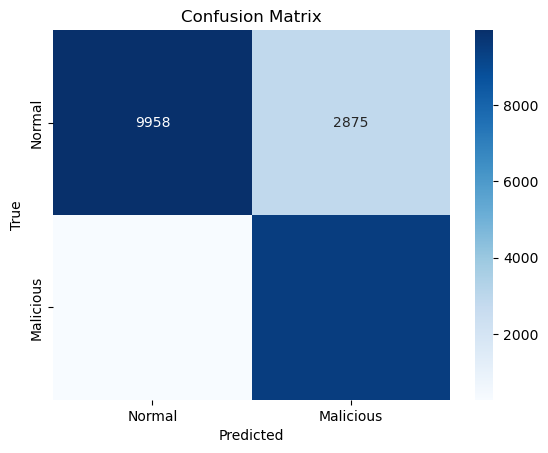

              precision    recall  f1-score   support

           0       0.97      0.78      0.86     12833
           1       0.77      0.97      0.86      9711

    accuracy                           0.86     22544
   macro avg       0.87      0.87      0.86     22544
weighted avg       0.88      0.86      0.86     22544



In [33]:
# Predictions on test set
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Malicious'], yticklabels=['Normal', 'Malicious'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))


In [38]:
import joblib

# Save the trained model
model_folder = "../../3_Post-Modeling-Phase/Trained_ML_models/Models-NSL-KDD/"
model_filename = "NSL-KDD_Neural_Network.joblib"
model_path = model_folder + model_filename

# Save the model using joblib
joblib.dump(model, model_path)
print(f"Bayesian model saved to: {model_path}")

Bayesian model saved to: ../../3_Post-Modeling-Phase/Trained_ML_models/Models-NSL-KDD/NSL-KDD_Neural_Network.joblib
